In [2]:
from typing import Any, Optional
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from scipy.signal import convolve
from glio.python_tools import shape, ndims
import numpy as np
import torch
data = torch.randn(100)
data2 = torch.sin(torch.linspace(0, 10, 1000))
data2x = torch.linspace(0, 100, 1000)

# parsing data
data is parsed into shape of (B, 2, N) or (B, 1, N). E.g. `[([1, 2, 3, 4, 5], [0.9, 0.9, 0.8, 0.75, 0.75]), ([1, 2, 3, 4, 5], [0.9, 0.9, 0.8, 0.75, 0.75])]`

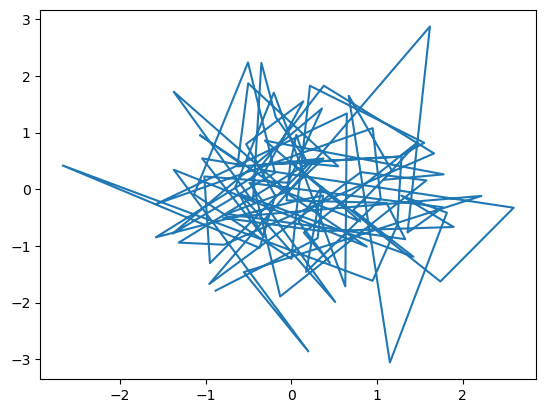

In [25]:
_scalartype = (int,float,np.ScalarType)
def _parse_plotdata(data):
    # to numpy if possible
    if isinstance(data, torch.Tensor): data = data.detach().cpu().numpy()
    if isinstance(data, (list, tuple)) and isinstance(data[0], torch.Tensor): data = [(t.detach().cpu().numpy() if isinstance(t, torch.Tensor) else t) for t in data]
    
    # numpy
    # determine data format and convert to sequence of (2, N) or (1, N), so (B, 2, N) / (B, 1, N)
    if isinstance(data, np.ndarray):
        # list of values
        if data.ndim == 1: return [[data]] # returns (1, 1, N)

        # either list of x,y pairs, will have shape=(2,N) or (N,2), or list of linecharts, will have a shape of (N, B)
        if data.ndim == 2:
            if data.shape[0] == 2: return [data] # data already in (2, N) format, e.g. ([1,2,3,4,5], [3,2,5,6,2]), return (1,2,N)
            if data.shape[1] == 2: return [data.T] # data in (N, 2) format, e.g. ([1, 3], [2, 4], [3, 5]), transpose and return (1, 2, N)

            # multiple lines assumed to be in (N, B), e.g. ([3,5,6,3,5,7,9,1], [1,3,6,1,1,5,7,8,5], [1,2,1,1,1,7,6,5,2])
            return [[line] for line in data] # return (B, 1 N)

        # list of lists of x,y pairs, will have shape=(B, 2, N) or (B, N, 2)
        if data.ndim == 3:
            if data.shape[1] == 2: return [line for line in data] # data in (B, 2, N), return it as list
            if data.shape[2] == 2: return [line.T for line in data] # data in (B, N, 2), return transpose into (B, 2, N)

        else: raise ValueError(f"Invalid data shape for plotting: {data.shape}")

    # dicts
    if isinstance(data, dict):
        items = list(data.items())
        # first value is a number, so its a dictionary of (key: scalar)
        if isinstance(items[0][1], _scalartype):
            # first key is a number, so its a dictionary of (scalar: scalar)
            if isinstance(items[0][0], _scalartype): return [list(zip(items))] # returns (1, 2, N)
            # otherwise we don't know how to use keys, we use only values
            else: return [[[i[1] for i in items]]] # returns only values, (1, 1, N)

        # else it is a dictionary of separate linecharts
        # dictionary of lists of scalars, return list of lists of scalars
        elif isinstance(items[0][1][0], _scalartype): return [[i[1]] for i in items] # returns (B, 1, N)
        # dictionary of lists of x-y pairs
        elif len(items[0][1][0]) == 2: return [list(zip(i[1])) for i in items] # returns (B, 2, N)
        # dictionary of lists of lists of x-y pairs
        else: return [i[1] for i in items] # returns (B, 2, N)

    # other sequences
    # first value is a scalars, so its a list of scalars
    if isinstance(data[0], _scalartype): return [data] # returns (1, 1, N)

    # first value is a list of scalars, so either list of linecharts or x-y pairs
    if isinstance(data[0][0], _scalartype):
        # list of linecharts, e.g. [[1,2,3,6,4], [5,3,1,5,4,2,1], [1,2,5]]
        if len(data[0]) == 2: return [[i] for i in data] # returns (B, 1, N)
        # list of x-y pairs, e.g. [[1,5], [1,8], [3,3], [7,4]]
        else: return [[i] for i in zip(data)] # returns (1, 2, N)

    # else its a list of lists of whatevers
    else:
        print(data[0][0])
        print(type(data[0][0]))
        # list of lists of x-y pairs, e.g. [[[1,5], [1,8], [3,3], [7,4]], [[1,2], [3,4], [5,6]]]
        if len(data[0][0]) == 2: return [list(zip(i)) for i in data] # returns (B, 2, N)
        # list of lists of x/y, e.g. [[[1,2,3,4],[1,2,2,3]], [[1,2,3,4],[4,5,6,7]]], which is already (B, 2, N)
        else: return data

def autoplot(data):
    data = _parse_plotdata(data)
    for d in data:
        plt.plot(*d)
    plt.show()
autoplot(np.random.randn(2,100))

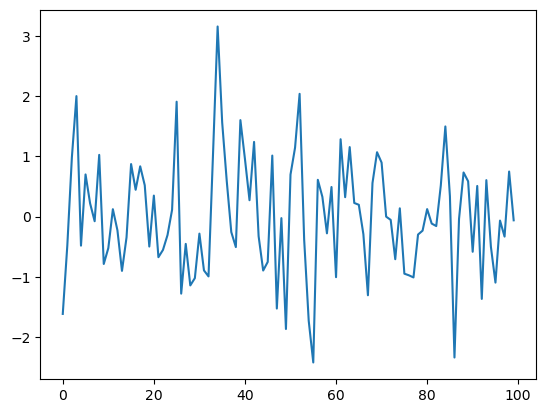

In [12]:
plt.plot(data)

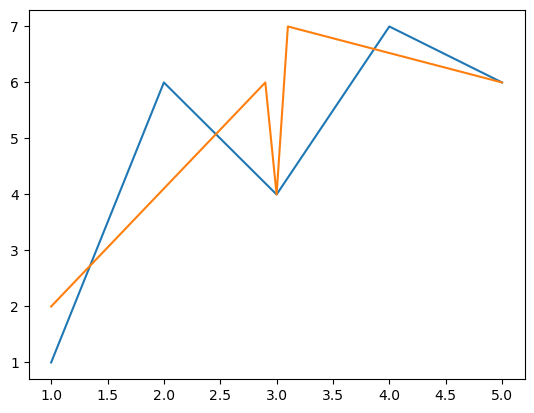

In [11]:
x = [1,2,3,4,5]
y = [1,6,4,7,6]

x2 = [1,2.9,3,3.1,5]
y2 = [2,6,4,7,6]

plt.plot(x,y,x2,y2)